In [1]:
import json
from pathlib import Path

In [2]:

def load_json(filename: Path):
    with open(filename, "r") as fp:
        res = json.load(fp=fp)
    return res

def standardize_json(filename_csv,labels):
    with open(filename_csv,"r") as f : 
        a = f.readlines() 
    if labels[-1] != len(a[1:]) and labels[-1] != len(a[1:])-1:
        labels.append(len(a[1:])) 
    elif labels[-1] == len(a[1:])-1 :
        labels[-1] = len(a[1:])
    
    # création d'un fichier json qui contient les indices des labels, porte le même nom que le fichier csv
    labels.sort() # tri la liste dans la cas où les labels n'ont pas été posées dans le bon ordre
    with open(filename_csv.split(".")[0]+".json","w") as f : 
        f.write(json.dumps(labels))

In [4]:
labels = load_json(Path("2.json"))
standardize_json("2.csv",labels)

In [15]:
filename = "3.pred.csv"
file_temp = filename.split(".")[:-1]
print('.'.join(file_temp))

3.pred


In [6]:
def load_json(filename: Path):
    with open(filename, "r") as fp:
        res = json.load(fp=fp)
    return res

data = load_json("test.json")
data

[3, 10, 11]

In [3]:
array = [3,10,11]
with open("test.json","w") as f : 
    f.write(json.dumps(array))

In [4]:
filename = "media/113/train/1.csv"
array =  ['116', '245', '371']


In [5]:
filename.split(".")

['media/113/train/1', 'csv']

In [9]:
import numpy as np
from pathlib import Path
import json
import numpy as np
import ruptures as rpt
from scipy.optimize import minimize
import re

def load_json(filename: Path):
    with open(filename, "r") as fp:
        res = json.load(fp=fp)
    return res


def write_json(obj, filename: Path) -> None:
    with open(filename, "w") as fp:
        json.dump(obj=obj, fp=fp)


def load_train_data(folder_train: Path):
    err_msg = f"Train folder not found: {folder_train}"
    assert folder_train.exists() and folder_train.is_dir(), err_msg

    X_train = list()
    y_train = list()
    for filename in folder_train.iterdir():
        if filename.suffix == ".json":
            label = load_json(filename=filename)
            header = is_header(filename.with_suffix(".csv"))
            if header:
                signal = np.loadtxt(fname=filename.with_suffix(".csv"),skiprows=1)
            else : 
                signal = np.loadtxt(fname=filename.with_suffix(".csv"))
            X_train.append(signal)
            y_train.append(label)
    return X_train, y_train
        

def is_header(filename: Path):
    regex_match = "^[a-zA-Z]"
    with open(filename, "r") as fp:
        a = fp.readline()
    x =re.search(regex_match,a)
    return x


In [7]:
# def is_header(filename: Path,regex_match):
#     with open(filename, "r") as fp:
#         a = fp.readline()
#     x =re.search(regex_match,a)
#     return x

In [10]:
x = (is_header(Path("train/1.csv")))
if x :
    print("ok")
    signal = np.loadtxt(fname=Path("train/1.csv"),skiprows=1)

ok


In [11]:
x_train,y_train = load_train_data(Path("train"))

In [12]:
len(x_train)

3

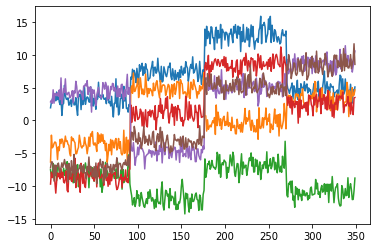

In [17]:
import matplotlib.pyplot as plt

# plt.plot(x_train[0])
plt.plot(x_train[1])
# plt.plot(x_train[2])
plt.show()

In [19]:
print(x_train[1].shape)

(350, 6)


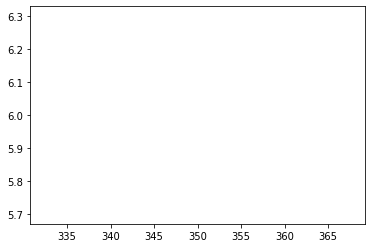

In [20]:
plt.plot(x_train[1].shape[0],x_train[1].shape[1])

In [35]:
regex_match = "^[a-zA-Z]" #regex pour voir si les mots commence par une valeuur ou pas
float_match = "[+-]?([0-9]+([.][0-9]*)?|[.][0-9]+)" # regex match pour les float
alpha = is_header(Path("train/2.csv"),regex_match)
beta = is_header(Path("train/1.csv"),regex_match)
gamma = is_header(Path("train/1_original.csv"),regex_match)
if alpha : 
    print("Il y a une valeur")
if beta : 
    print("Il y a une valeur")
if gamma : 
    print("doit commencer par des nombres")

Il y a une valeur
Il y a une valeur


In [33]:
print(re.search("[0-9]","1213A"))

<re.Match object; span=(0, 1), match='1'>
